In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## first lets try using all the scaled features and see if the models do well

In [3]:
df = pd.read_csv('music_features_scaled.csv').drop(columns=['chromagram'])
X = df.drop(columns=['genre'])
Y = df['genre']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [4]:
# sizes of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(799, 50)
(200, 50)


## Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=600, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(Y_test, rf_pred))

Random Forest Results:
              precision    recall  f1-score   support

       blues       0.67      0.86      0.75        21
   classical       0.59      0.83      0.69        12
     country       0.73      0.46      0.56        24
       disco       0.88      0.95      0.91        22
      hiphop       0.82      0.60      0.69        15
        jazz       0.74      0.63      0.68        27
       metal       0.78      1.00      0.88        18
         pop       0.79      1.00      0.88        19
      reggae       0.85      0.77      0.81        22
        rock       0.69      0.55      0.61        20

    accuracy                           0.76       200
   macro avg       0.75      0.77      0.75       200
weighted avg       0.76      0.76      0.75       200



In [ ]:
# grid search for best parameters for random forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

print("Best parameters for Random Forest:")
print(grid_search.best_params_)
print("Best score for Random Forest:")
print(grid_search.best_score_)
print("Best estimator for Random Forest:")
print(grid_search.best_estimator_)



### Best parameters for Random Forest:
{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best score for Random Forest:
0.7484206771610674
Best estimator for Random Forest:
RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=400,
                       random_state=42)

In [7]:
# best random forest model

rf_model_best = RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=400, min_samples_leaf=1, max_features='sqrt', min_samples_split=2,
                       random_state=42)
rf_model_best.fit(X_train, Y_train)
rf_pred_best = rf_model_best.predict(X_test)

print("Random Forest Best Results:")
print(classification_report(Y_test, rf_pred_best))

Random Forest Best Results:
              precision    recall  f1-score   support

       blues       0.69      0.86      0.77        21
   classical       0.61      0.92      0.73        12
     country       0.71      0.42      0.53        24
       disco       0.80      0.91      0.85        22
      hiphop       0.80      0.53      0.64        15
        jazz       0.68      0.63      0.65        27
       metal       0.78      1.00      0.88        18
         pop       0.75      0.95      0.84        19
      reggae       0.94      0.77      0.85        22
        rock       0.59      0.50      0.54        20

    accuracy                           0.73       200
   macro avg       0.74      0.75      0.73       200
weighted avg       0.74      0.73      0.72       200



## SVM

In [8]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Results:")
print(classification_report(Y_test, svm_pred))

SVM Results:
              precision    recall  f1-score   support

       blues       0.36      0.43      0.39        21
   classical       0.79      0.92      0.85        12
     country       0.53      0.38      0.44        24
       disco       0.47      0.32      0.38        22
      hiphop       0.67      0.40      0.50        15
        jazz       0.58      0.70      0.63        27
       metal       0.69      1.00      0.82        18
         pop       0.48      0.84      0.62        19
      reggae       0.82      0.64      0.72        22
        rock       0.55      0.30      0.39        20

    accuracy                           0.57       200
   macro avg       0.59      0.59      0.57       200
weighted avg       0.58      0.57      0.56       200



In [9]:
svm_model = SVC(kernel='poly', random_state=42)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Results:")
print(classification_report(Y_test, svm_pred))

SVM Results:
              precision    recall  f1-score   support

       blues       0.43      0.14      0.21        21
   classical       0.80      0.67      0.73        12
     country       0.31      0.46      0.37        24
       disco       0.54      0.32      0.40        22
      hiphop       1.00      0.20      0.33        15
        jazz       0.64      0.33      0.44        27
       metal       0.74      0.78      0.76        18
         pop       0.74      0.74      0.74        19
      reggae       0.90      0.41      0.56        22
        rock       0.19      0.65      0.29        20

    accuracy                           0.46       200
   macro avg       0.63      0.47      0.48       200
weighted avg       0.61      0.46      0.47       200



# XGBOOST

In [10]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# First encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(Y_train)
y_test_encoded = label_encoder.transform(Y_test)

# Now create and train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_encoded)
xgb_pred = xgb_model.predict(X_test)

# Convert predictions back to genre names for the classification report
xgb_pred_decoded = label_encoder.inverse_transform(xgb_pred)

print("XGBoost Results:")
print(classification_report(Y_test, xgb_pred_decoded))


XGBoost Results:
              precision    recall  f1-score   support

       blues       0.54      0.71      0.61        21
   classical       0.63      1.00      0.77        12
     country       0.63      0.50      0.56        24
       disco       0.81      0.77      0.79        22
      hiphop       0.75      0.60      0.67        15
        jazz       0.71      0.63      0.67        27
       metal       0.82      1.00      0.90        18
         pop       0.83      1.00      0.90        19
      reggae       0.89      0.73      0.80        22
        rock       0.79      0.55      0.65        20

    accuracy                           0.73       200
   macro avg       0.74      0.75      0.73       200
weighted avg       0.74      0.73      0.72       200



# Let's use the most important features only 

In [11]:
df_2 = pd.read_csv('top_features_scaled.csv')
X = df_2.drop(columns=['genre'])
Y = df_2['genre']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [12]:
rf_model_2 = RandomForestClassifier(n_estimators=600, random_state=42)
rf_model_2.fit(X_train, Y_train)
rf_pred = rf_model_2.predict(X_test)

print("Random Forest Results:")
print(classification_report(Y_test, rf_pred))

Random Forest Results:
              precision    recall  f1-score   support

       blues       0.55      0.76      0.64        21
   classical       0.71      0.83      0.77        12
     country       0.42      0.33      0.37        24
       disco       0.62      0.45      0.53        22
      hiphop       0.54      0.47      0.50        15
        jazz       0.75      0.56      0.64        27
       metal       0.72      1.00      0.84        18
         pop       0.78      0.74      0.76        19
      reggae       0.60      0.68      0.64        22
        rock       0.43      0.45      0.44        20

    accuracy                           0.61       200
   macro avg       0.61      0.63      0.61       200
weighted avg       0.61      0.61      0.60       200



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model_2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

print("Best parameters for Random Forest:")
print(grid_search.best_params_)
print("Best score for Random Forest:")
print(grid_search.best_score_)
print("Best estimator for Random Forest:")
print(grid_search.best_estimator_)

### Best parameters for Random Forest:
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best score for Random Forest:
0.5694902049130316
Best estimator for Random Forest:
RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, random_state=42)

In [14]:
# best random forest model

rf_model_best_2 = RandomForestClassifier(bootstrap=True, max_depth=10, n_estimators=300, min_samples_leaf=2, max_features='sqrt', min_samples_split=5, random_state=42)

rf_model_best_2.fit(X_train, Y_train)
rf_pred_best = rf_model_best_2.predict(X_test)

print("Random Forest Best Results:")
print(classification_report(Y_test, rf_pred_best))

Random Forest Best Results:
              precision    recall  f1-score   support

       blues       0.58      0.71      0.64        21
   classical       0.62      0.83      0.71        12
     country       0.42      0.33      0.37        24
       disco       0.59      0.45      0.51        22
      hiphop       0.50      0.47      0.48        15
        jazz       0.70      0.59      0.64        27
       metal       0.63      0.94      0.76        18
         pop       0.78      0.74      0.76        19
      reggae       0.60      0.68      0.64        22
        rock       0.40      0.30      0.34        20

    accuracy                           0.59       200
   macro avg       0.58      0.61      0.59       200
weighted avg       0.58      0.59      0.58       200



In [15]:
svm_model_2 = SVC(kernel='poly', random_state=42)
svm_model_2.fit(X_train, Y_train)
svm_pred = svm_model_2.predict(X_test)

print("SVM Results:")
print(classification_report(Y_test, svm_pred))

SVM Results:
              precision    recall  f1-score   support

       blues       0.59      0.48      0.53        21
   classical       0.67      0.83      0.74        12
     country       0.83      0.21      0.33        24
       disco       0.50      0.32      0.39        22
      hiphop       0.80      0.27      0.40        15
        jazz       0.70      0.26      0.38        27
       metal       0.81      0.72      0.76        18
         pop       0.82      0.74      0.78        19
      reggae       0.64      0.41      0.50        22
        rock       0.21      0.90      0.34        20

    accuracy                           0.48       200
   macro avg       0.66      0.51      0.51       200
weighted avg       0.65      0.48      0.50       200



In [16]:
# xgboost
y_train_encoded = label_encoder.fit_transform(Y_train)
y_test_encoded = label_encoder.transform(Y_test)

# Now create and train the model
xgb_model_2 = XGBClassifier(random_state=42)
xgb_model_2.fit(X_train, y_train_encoded)
xgb_pred = xgb_model_2.predict(X_test)

# Convert predictions back to genre names for the classification report
xgb_pred_decoded = label_encoder.inverse_transform(xgb_pred)

print("XGBoost Results:")
print(classification_report(Y_test, xgb_pred_decoded))

XGBoost Results:
              precision    recall  f1-score   support

       blues       0.63      0.81      0.71        21
   classical       0.77      0.83      0.80        12
     country       0.59      0.42      0.49        24
       disco       0.65      0.50      0.56        22
      hiphop       0.50      0.33      0.40        15
        jazz       0.65      0.56      0.60        27
       metal       0.69      1.00      0.82        18
         pop       0.68      0.68      0.68        19
      reggae       0.63      0.77      0.69        22
        rock       0.38      0.40      0.39        20

    accuracy                           0.62       200
   macro avg       0.62      0.63      0.61       200
weighted avg       0.61      0.62      0.61       200



# Stacking


In [17]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), 
                yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

### Best parameters for Random Forest:
{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best score for Random Forest:
0.7484206771610674
Best estimator for Random Forest:
RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=400,
                       random_state=42)

In [36]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# First, encode labels for XGBoost
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(Y_train)
y_test_encoded = label_encoder.transform(Y_test)

# Define base models
rf = RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=400, 
                           min_samples_leaf=1, max_features='sqrt', 
                           min_samples_split=2, random_state=42)
                           
xgb = XGBClassifier(random_state=42)

# Train base models
rf.fit(X_train, Y_train)
xgb.fit(X_train, y_train_encoded)

# Get predictions
rf_pred = rf.predict_proba(X_test)
xgb_pred = xgb.predict_proba(X_test)

# Combine predictions for meta-features
meta_features = np.column_stack((rf_pred, xgb_pred))

# Train meta-classifier
meta_clf = LogisticRegression(random_state=42)
meta_clf.fit(meta_features, Y_test)

# Make final predictions
final_pred = meta_clf.predict(meta_features)

# Print results
print("Stacking Results:")
print(classification_report(Y_test, final_pred))

Stacking Results:
              precision    recall  f1-score   support

       blues       0.63      0.81      0.71        21
   classical       0.77      0.83      0.80        12
     country       0.50      0.58      0.54        24
       disco       0.60      0.55      0.57        22
      hiphop       0.62      0.33      0.43        15
        jazz       0.62      0.56      0.59        27
       metal       0.69      1.00      0.82        18
         pop       0.68      0.68      0.68        19
      reggae       0.65      0.77      0.71        22
        rock       0.44      0.20      0.28        20

    accuracy                           0.62       200
   macro avg       0.62      0.63      0.61       200
weighted avg       0.61      0.62      0.61       200



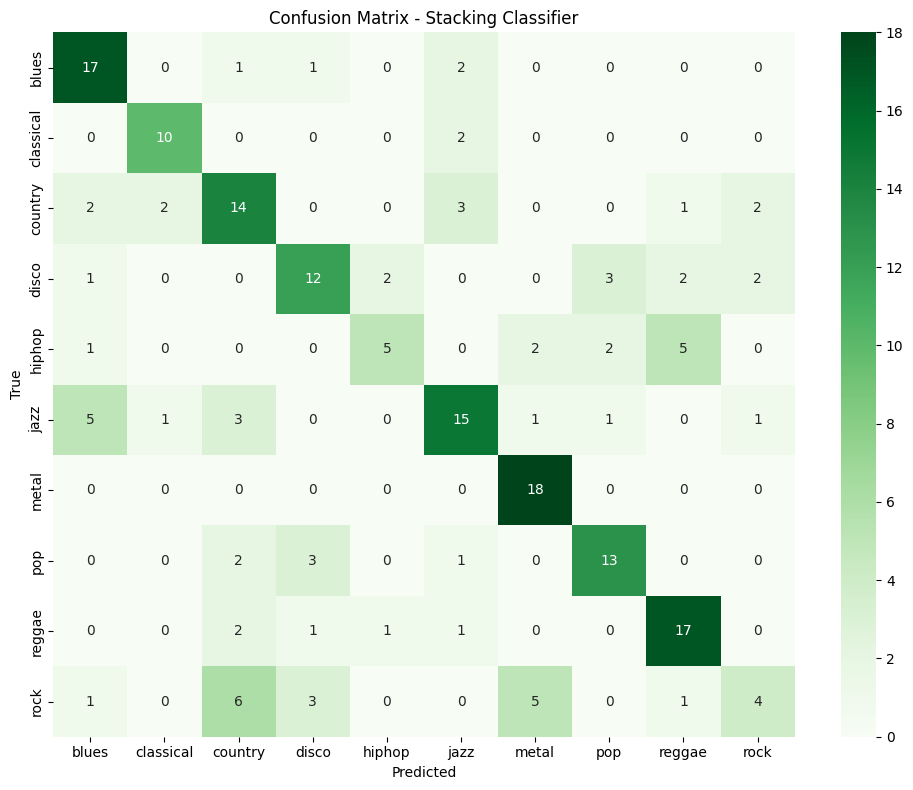

In [37]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=labels, 
                yticklabels=labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(Y_test, final_pred, "Stacking Classifier")